In [1]:
import os
import random

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
import statsmodels.api as sm


# df = pd.read_csv('K-League-data.csv').drop(columns='Unnamed: 0')
# print(df.shape)
# df.head(1)

df2 = pd.read_csv('K-League-data2.csv').drop(columns='Unnamed: 0')
print(df2.shape)
df2.head(1)


(666, 99)


,Rnd.,대회,홈 득점,홈 도움,홈 슈팅,홈 유효 슈팅,홈 블락된슈팅,홈 벗어난슈팅,홈 PA내 슈팅,홈 PA외 슈팅,...,원정 피파울,원정 경고,원정 퇴장,원정 팀,원정 경기결과,원정 소속 선수 수,원정 평균 나이,원정 용병 수,원정 평균 가치,원정 총 가치
0,1,대구vs수원FC,1,1,13,4,2,7,5,8,...,13,3,0,suwonFC,D,36,25.6,5,350.0,12.6


In [2]:
print(df2.columns)
df2['홈 팀'].unique()

Index(['Rnd.', '대회', '홈 득점', '홈 도움', '홈 슈팅', '홈 유효 슈팅', '홈 블락된슈팅', '홈 벗어난슈팅',
       '홈 PA내 슈팅', '홈 PA외 슈팅', '홈 프리킥 슈팅', '홈 프리킥 유효슈팅', '홈 프리킥 크로스',
       '홈 오프사이드', '홈 코너킥', '홈 스로인', '홈 드리블', '홈 패스', '홈 키패스', '홈 전방패스',
       '홈 후방패스', '홈 횡패스', '홈 공격진영 패스', '홈 수비진영 패스', '홈 중앙진영 패스', '홈 롱패스',
       '홈 중거리패스', '홈 단거리패스', '홈 크로스', '홈 탈압박', '홈 경합 지상', '홈 경합 공중', '홈 태클',
       '홈 클리어링', '홈 인터셉트', '홈 차단', '홈 획득', '홈 블락', '홈 볼미스', '홈 파울', '홈 피파울',
       '홈 경고', '홈 퇴장', '홈 팀', '시즌', '홈 경기결과', '홈 소속 선수 수', '홈 평균 나이', '홈 용병 수',
       '홈 평균 가치', '홈 총 가치', '원정 득점', '원정 도움', '원정 슈팅', '원정 유효 슈팅', '원정 블락된슈팅',
       '원정 벗어난슈팅', '원정 PA내 슈팅', '원정 PA외 슈팅', '원정 프리킥 슈팅', '원정 프리킥 유효슈팅',
       '원정 프리킥 크로스', '원정 오프사이드', '원정 코너킥', '원정 스로인', '원정 드리블', '원정 패스',
       '원정 키패스', '원정 전방패스', '원정 후방패스', '원정 횡패스', '원정 공격진영 패스', '원정 수비진영 패스',
       '원정 중앙진영 패스', '원정 롱패스', '원정 중거리패스', '원정 단거리패스', '원정 크로스', '원정 탈압박',
       '원정 경합 지상', '원정 경합 공중', '원정 태클', '원정 클리어링', '원정 인터셉트', '원정 차단', '원정 획득',
       '원정 블락', 

array(['daegu', 'jeju', 'seoul', 'pohang', 'gangwon', 'ulsan', 'seongnam',
       'jeonbuk', 'incheon', 'suwon', 'daejeon', 'gwangju', 'suwonFC',
       'gimcheon'], dtype=object)

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)

# 시드 고정
seed_everything(42)

In [4]:
X = df2.drop(columns=['대회', '홈 경기결과', '원정 경기결과']) # 필요 없거나 중복되는 열 제거
X = pd.get_dummies(X, columns=['홈 팀', '원정 팀'], drop_first=False) # 문자 숫자로 바꾸기

y = df2['홈 경기결과']  # 홈 팀 기준으로 승부 예측. (홈 승? >> 원정 패, 홈 패? >> 원정 승리) // 원정 경기결과를 넣어도 예측 결과 동일

# 경기 결과 (W, D, L)를 숫자로 
le = LabelEncoder()
y = le.fit_transform(y)

# train/test 분리. 데이터셋의 개수가 작아서 9:1로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# scaler = StandardScaler()  
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(599, 122) (67, 122)
(599,) (67,)


In [10]:
# 다항 로지스틱 회귀

model = LogisticRegression(random_state=42, solver='newton-cg',max_iter=500)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8656716417910447
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.85      0.88      0.86        25
           2       0.96      0.93      0.94        27

    accuracy                           0.87        67
   macro avg       0.85      0.85      0.85        67
weighted avg       0.87      0.87      0.87        67

[[11  3  1]
 [ 3 22  0]
 [ 1  1 25]]


In [11]:
# 다층신경망

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=42, max_iter=500)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7910447761194029
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        15
           1       0.79      0.88      0.83        25
           2       0.88      0.85      0.87        27

    accuracy                           0.79        67
   macro avg       0.76      0.76      0.76        67
weighted avg       0.79      0.79      0.79        67

[[ 8  4  3]
 [ 3 22  0]
 [ 2  2 23]]


In [12]:
# LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7313432835820896
              precision    recall  f1-score   support

           0       0.45      0.60      0.51        15
           1       0.78      0.72      0.75        25
           2       0.92      0.81      0.86        27

    accuracy                           0.73        67
   macro avg       0.72      0.71      0.71        67
weighted avg       0.76      0.73      0.74        67

[[ 9  4  2]
 [ 7 18  0]
 [ 4  1 22]]


In [13]:
# QDA

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5223880597014925
              precision    recall  f1-score   support

           0       1.00      0.53      0.70        15
           1       0.43      0.12      0.19        25
           2       0.46      0.89      0.61        27

    accuracy                           0.52        67
   macro avg       0.63      0.51      0.50        67
weighted avg       0.57      0.52      0.47        67

[[ 8  1  6]
 [ 0  3 22]
 [ 0  3 24]]


c:\Users\HONG\miniconda3\envs\data\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [14]:
# SVM

from sklearn import svm

model = svm.SVC(random_state=42, kernel='linear')
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9552238805970149
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.96      0.96      0.96        25
           2       1.00      0.93      0.96        27

    accuracy                           0.96        67
   macro avg       0.95      0.96      0.95        67
weighted avg       0.96      0.96      0.96        67

[[15  0  0]
 [ 1 24  0]
 [ 1  1 25]]


In [15]:
# 그래디언트부스팅

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42, max_depth=3, n_estimators=500, )
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:10]

Accuracy: 0.9850746268656716
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        27

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67

[[15  0  0]
 [ 0 25  0]
 [ 0  1 26]]


,Feature,Importance
1,홈 득점,0.482102
48,원정 득점,0.457696
4,홈 유효 슈팅,0.005140
79,원정 클리어링,0.005003
69,원정 수비진영 패스,0.004090
83,원정 블락,0.003455
24,홈 롱패스,0.003049
0,Rnd.,0.003014
52,원정 블락된슈팅,0.002879
40,홈 경고,0.002755


In [16]:
# 에이다 부스트

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=42,)
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:10]

Accuracy: 0.6417910447761194
              precision    recall  f1-score   support

           0       0.39      0.93      0.55        15
           1       0.92      0.48      0.63        25
           2       0.94      0.63      0.76        27

    accuracy                           0.64        67
   macro avg       0.75      0.68      0.65        67
weighted avg       0.81      0.64      0.66        67

[[14  0  1]
 [13 12  0]
 [ 9  1 17]]


,Feature,Importance
1,홈 득점,0.30
48,원정 득점,0.24
80,원정 인터셉트,0.04
32,홈 클리어링,0.04
7,홈 PA내 슈팅,0.04
0,Rnd.,0.02
62,원정 드리블,0.02
27,홈 크로스,0.02
40,홈 경고,0.02
66,원정 후방패스,0.02


In [17]:
# lightgbm

import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=42, max_depth=3, n_estimators=500)
lgb_model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:10]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5247
[LightGBM] [Info] Number of data points in the train set: 599, number of used features: 117
[LightGBM] [Info] Start training from score -1.191255
[LightGBM] [Info] Start training from score -1.180326
[LightGBM] [Info] Start training from score -0.944223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,Feature,Importance
1,홈 득점,0.30
48,원정 득점,0.24
80,원정 인터셉트,0.04
32,홈 클리어링,0.04
7,홈 PA내 슈팅,0.04
0,Rnd.,0.02
62,원정 드리블,0.02
27,홈 크로스,0.02
40,홈 경고,0.02
66,원정 후방패스,0.02


In [18]:
# randomforest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:10]

Accuracy: 0.8656716417910447
              precision    recall  f1-score   support

           0       1.00      0.53      0.70        15
           1       0.86      0.96      0.91        25
           2       0.84      0.96      0.90        27

    accuracy                           0.87        67
   macro avg       0.90      0.82      0.83        67
weighted avg       0.88      0.87      0.85        67

[[ 8  3  4]
 [ 0 24  1]
 [ 0  1 26]]


,Feature,Importance
1,홈 득점,0.096394
48,원정 득점,0.089956
49,원정 도움,0.044657
2,홈 도움,0.031591
4,홈 유효 슈팅,0.027650
32,홈 클리어링,0.016233
79,원정 클리어링,0.015515
51,원정 유효 슈팅,0.013524
82,원정 획득,0.012865
83,원정 블락,0.012549


In [19]:
# XgBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = XGBClassifier()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:10]

Accuracy: 0.9850746268656716
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        27

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67

[[15  0  0]
 [ 0 25  0]
 [ 0  1 26]]


,Feature,Importance
1,홈 득점,0.125054
48,원정 득점,0.106937
19,홈 후방패스,0.033555
86,원정 피파울,0.029210
50,원정 슈팅,0.027097
17,홈 키패스,0.024655
12,홈 오프사이드,0.021796
51,원정 유효 슈팅,0.021676
40,홈 경고,0.020428
83,원정 블락,0.018632


In [20]:
# CatBoost
from catboost import CatBoostClassifier


model = CatBoostClassifier(random_seed=42, metric_period=100, depth=4)

model.fit(X_train_scaled, y_train)  # Specify categorical features

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:10]

Learning rate set to 0.077085
0:	learn: 0.9912699	total: 145ms	remaining: 2m 24s
100:	learn: 0.1589456	total: 593ms	remaining: 5.28s
200:	learn: 0.1050250	total: 933ms	remaining: 3.71s
300:	learn: 0.0738069	total: 1.31s	remaining: 3.04s
400:	learn: 0.0563371	total: 1.72s	remaining: 2.57s
500:	learn: 0.0457521	total: 2.01s	remaining: 2s
600:	learn: 0.0363045	total: 2.34s	remaining: 1.56s
700:	learn: 0.0315497	total: 2.67s	remaining: 1.14s
800:	learn: 0.0264288	total: 2.98s	remaining: 741ms
900:	learn: 0.0232060	total: 3.33s	remaining: 366ms
999:	learn: 0.0197731	total: 3.68s	remaining: 0us
Accuracy: 0.9850746268656716
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        27

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99      

,Feature,Importance
1,홈 득점,45.577347
48,원정 득점,45.438735
49,원정 도움,2.061090
2,홈 도움,1.214313
4,홈 유효 슈팅,0.322380
32,홈 클리어링,0.301067
7,홈 PA내 슈팅,0.269853
79,원정 클리어링,0.235810
80,원정 인터셉트,0.209897
82,원정 획득,0.209427


# PCA

In [ ]:
from sklearn.decomposition import PCA
X = df2.drop(columns=['대회', '홈 경기결과', '원정 경기결과'])
X = pd.get_dummies(X, columns=['홈 팀', '원정 팀'], drop_first=False)

y = df2['홈 경기결과']  # 홈 팀 기준으로 승부 예측. (홈 승? >> 원정 패, 홈 패? >> 원정 승리) // 원정 경기결과를 넣어도 결과 동일

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# scaler = StandardScaler()  
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# pca 적용 : 정확도 95%가 될때까지
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

(599, 122) (67, 122)
(599,) (67,)


In [22]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                           'Proportion of variance': pca.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

# 122개의 특성들 중, PCA 95 % 적용 이후 특성은 57개 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57
Standard deviation,2.4509,2.4116,1.7185,1.6053,1.5195,1.4761,1.4035,1.3795,1.2954,1.2736,...,0.5123,0.4999,0.4776,0.4584,0.4312,0.4235,0.4180,0.4059,0.3931,0.3873
Proportion of variance,0.1046,0.1013,0.0514,0.0449,0.0402,0.0379,0.0343,0.0331,0.0292,0.0282,...,0.0046,0.0044,0.0040,0.0037,0.0032,0.0031,0.0030,0.0029,0.0027,0.0026
Cumulative proportion,0.1046,0.2058,0.2573,0.3021,0.3423,0.3803,0.4146,0.4477,0.4769,0.5051,...,0.9207,0.9251,0.9290,0.9327,0.9359,0.9391,0.9421,0.9450,0.9477,0.9503


In [23]:
contributions_df = pd.DataFrame(pca.components_, columns=X.columns)

# 상위 28개
print(contributions_df.abs().sum(axis=0).sort_values(ascending=False)[:28])

홈 크로스        5.963800
원정 크로스       5.932461
원정 코너킥       5.921974
홈 후방패스       5.671525
원정 도움        5.499336
홈 드리블        5.450329
홈 코너킥        5.443372
원정 스로인       5.364266
홈 프리킥 크로스    5.363661
원정 오프사이드     5.354919
홈 탈압박        5.325842
홈 프리킥 슈팅     5.316268
원정 드리블       5.311092
원정 PA외 슈팅    5.275501
원정 탈압박       5.264702
홈 도움         5.262525
원정 후방패스      5.260271
홈 스로인        5.217491
원정 경고        5.121857
홈 태클         5.086368
홈 오프사이드      5.060201
원정 롱패스       4.998792
원정 블락된슈팅     4.985911
원정 벗어난슈팅     4.983226
홈 유효 슈팅      4.938946
원정 태클        4.934159
홈 블락된슈팅      4.924208
원정 프리킥 슈팅    4.900270
dtype: float64


In [24]:
# 성능이 제일 괜찮은 회귀기반 모델 PCA 적용 후 예측

model = svm.SVC(random_state=42, kernel='linear')
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f'정확도: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# pca 이후 성능 유지 못함

정확도: 0.8059701492537313
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        15
           1       0.91      0.84      0.87        25
           2       0.83      0.89      0.86        27

    accuracy                           0.81        67
   macro avg       0.78      0.78      0.78        67
weighted avg       0.81      0.81      0.81        67

[[ 9  1  5]
 [ 4 21  0]
 [ 2  1 24]]


In [25]:
# 성능이 제일 괜찮은 트리기반 모델 PCA 적용 후 예측

model = CatBoostClassifier(random_seed=42, metric_period=100, depth=4)

model.fit(X_train_pca, y_train)  # Specify categorical features

y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# pca 이후 성능 유지 못함

Learning rate set to 0.077085
0:	learn: 1.0854339	total: 7.66ms	remaining: 7.65s
100:	learn: 0.6001401	total: 445ms	remaining: 3.96s
200:	learn: 0.3833384	total: 874ms	remaining: 3.48s
300:	learn: 0.2739456	total: 1.32s	remaining: 3.06s
400:	learn: 0.2023346	total: 1.8s	remaining: 2.7s
500:	learn: 0.1535876	total: 2.28s	remaining: 2.27s
600:	learn: 0.1222384	total: 2.69s	remaining: 1.79s
700:	learn: 0.0991545	total: 3.1s	remaining: 1.32s
800:	learn: 0.0824202	total: 3.52s	remaining: 873ms
900:	learn: 0.0697158	total: 3.92s	remaining: 431ms
999:	learn: 0.0590122	total: 4.32s	remaining: 0us
Accuracy: 0.7164179104477612
              precision    recall  f1-score   support

           0       0.50      0.53      0.52        15
           1       0.94      0.68      0.79        25
           2       0.70      0.85      0.77        27

    accuracy                           0.72        67
   macro avg       0.71      0.69      0.69        67
weighted avg       0.75      0.72      0.72      

# 변수 선택법 (단계적 선택법 stepwise selection) 

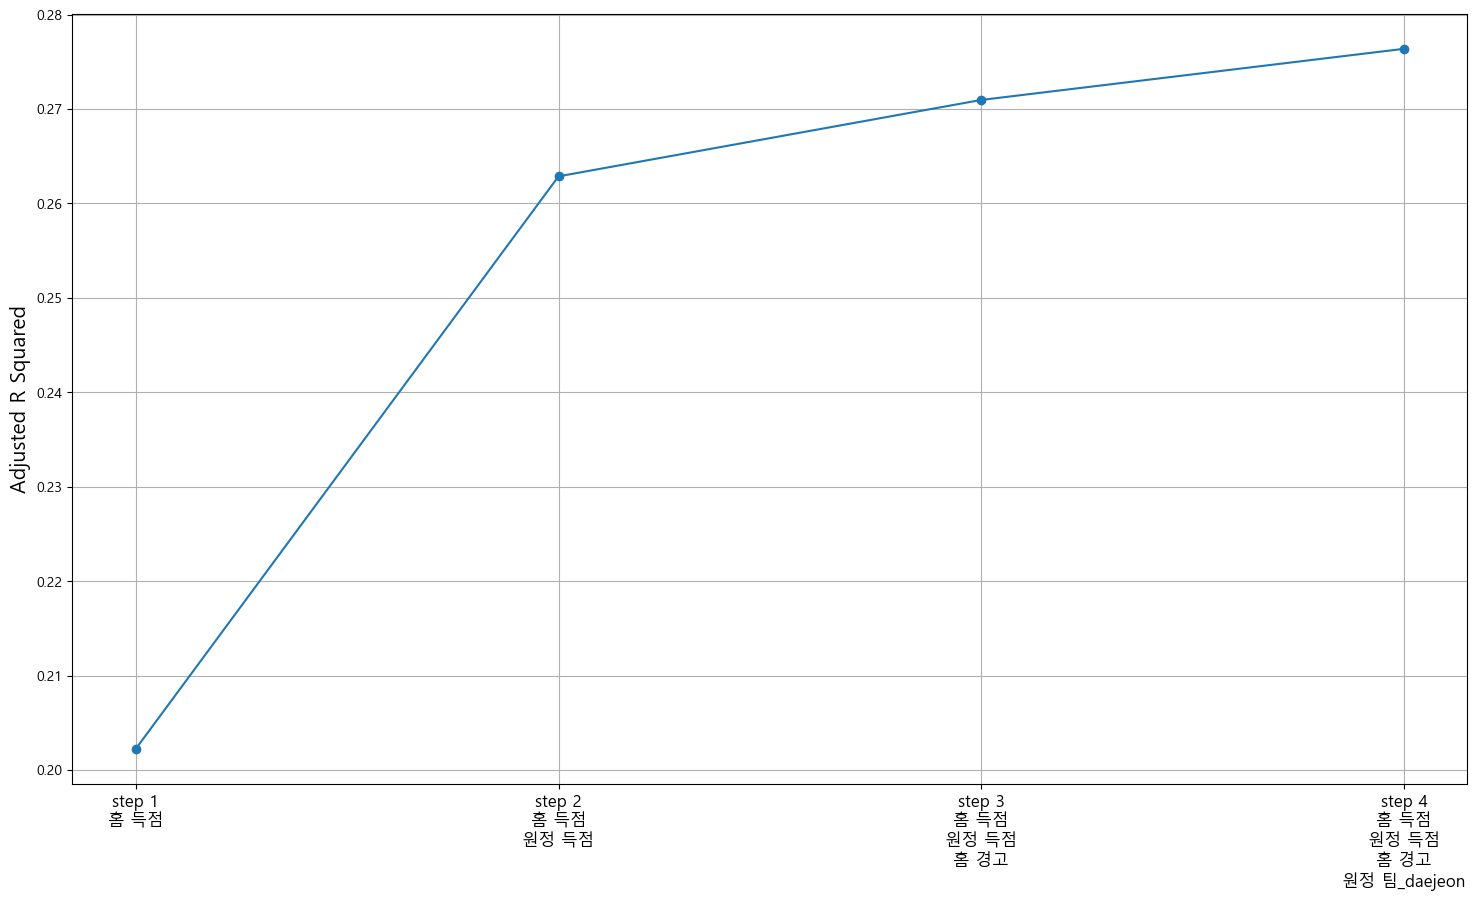

In [5]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    plt.rcParams['font.family'] = 'Malgun Gothic'

    
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            
            X = X_train[selected_variables+[col]]
            # print(X)
            X = sm.add_constant(X)
            # print(type(X))
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(18,10))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')
      
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables
    


# X_train에서 불리언 열만 선택
boolean_columns = X_train.select_dtypes(include='bool').columns
# 선택된 불리언 열을 정수(0 또는 1)로 변환
X_train[boolean_columns] = X_train[boolean_columns].astype(int)

selected_variables = stepwise_feature_selection(X_train, y_train)

In [27]:
selected_variables

# 변수선택법 적용 이후 4개의 변수만 선택

['홈 득점', '원정 득점', '홈 경고', '원정 팀_daejeon']

In [28]:
selected_X_train = X_train[selected_variables]
selected_X_test = X_test[selected_variables]

# 확인
print(selected_X_train.shape, selected_X_test.shape)
print(y_train.shape, y_test.shape)

scaler = RobustScaler()
selected_X_train_scaled = scaler.fit_transform(selected_X_train)
selected_X_test_scaled = scaler.transform(selected_X_test)

(599, 4) (67, 4)
(599,) (67,)


In [29]:
# 변수 선택법 적용한 다항 로지스틱 회귀

model = LogisticRegression(random_state=42, solver='newton-cg', max_iter=500)
model.fit(selected_X_train_scaled, y_train)

y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9850746268656716
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        27

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67

[[15  0  0]
 [ 0 25  0]
 [ 0  1 26]]


In [30]:
# 변수 선택법 적용한 다층신경망

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=42, max_iter=500)
model.fit(selected_X_train_scaled, y_train)

y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9850746268656716
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        27

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67

[[15  0  0]
 [ 0 25  0]
 [ 0  1 26]]


In [31]:
# 변수 선택법 적용한 LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(selected_X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9701492537313433
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.96      0.96      0.96        25
           2       1.00      0.96      0.98        27

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67

[[15  0  0]
 [ 1 24  0]
 [ 0  1 26]]


In [32]:
# 변수 선택법 적용 후 svm

from sklearn import svm

model = svm.SVC(random_state=42, kernel='linear')
model.fit(selected_X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9850746268656716
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        27

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67

[[15  0  0]
 [ 0 25  0]
 [ 0  1 26]]


In [33]:
# 변수 선택법 적용한 그래디언트부스팅

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42, max_depth=3, n_estimators=500, )
model.fit(selected_X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:]

Accuracy: 0.9850746268656716
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        27

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67

[[15  0  0]
 [ 0 25  0]
 [ 0  1 26]]


,Feature,Importance
0,홈 득점,0.501197
1,원정 득점,0.484918
2,홈 경고,0.011616
3,원정 팀_daejeon,0.002270


In [34]:
# 변수 선택법 적용한 에이다 부스트

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=42,)
model.fit(selected_X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:]

Accuracy: 0.6119402985074627
              precision    recall  f1-score   support

           0       0.34      0.73      0.47        15
           1       0.85      0.44      0.58        25
           2       0.86      0.70      0.78        27

    accuracy                           0.61        67
   macro avg       0.68      0.63      0.61        67
weighted avg       0.74      0.61      0.63        67

[[11  1  3]
 [14 11  0]
 [ 7  1 19]]


,Feature,Importance
0,홈 득점,0.56
1,원정 득점,0.28
2,홈 경고,0.14
3,원정 팀_daejeon,0.02


In [35]:
# 변수 선택법 적용한 lightgbm

import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=42, max_depth=3, n_estimators=500)
lgb_model.fit(selected_X_train_scaled, y_train)

y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 599, number of used features: 3
[LightGBM] [Info] Start training from score -1.191255
[LightGBM] [Info] Start training from score -1.180326
[LightGBM] [Info] Start training from score -0.944223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

,Feature,Importance
0,홈 득점,0.56
1,원정 득점,0.28
2,홈 경고,0.14
3,원정 팀_daejeon,0.02


In [36]:
# 변수 선택법 적용한 randomforest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, max_depth=3)
model.fit(selected_X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(selected_X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:]

Accuracy: 0.9552238805970149
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.96      0.92      0.94        25
           2       1.00      0.96      0.98        27

    accuracy                           0.96        67
   macro avg       0.95      0.96      0.95        67
weighted avg       0.96      0.96      0.96        67

[[15  0  0]
 [ 2 23  0]
 [ 0  1 26]]


,Feature,Importance
1,원정 득점,0.497906
0,홈 득점,0.473816
2,홈 경고,0.023538
3,원정 팀_daejeon,0.004740


In [37]:
# 변수 선택법 적용한 XgBoost
model = XGBClassifier()

model.fit(selected_X_train_scaled, y_train)

y_pred = model.predict(selected_X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:]

Accuracy: 0.9850746268656716
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        27

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67

[[15  0  0]
 [ 0 25  0]
 [ 0  1 26]]


,Feature,Importance
0,홈 득점,0.508357
1,원정 득점,0.429515
3,원정 팀_daejeon,0.043487
2,홈 경고,0.018641


In [38]:
# 변수 선택법 적용한 CatBoost


model = CatBoostClassifier(random_seed=42, metric_period=100, depth=2)

model.fit(selected_X_train_scaled, y_train)  

y_pred = model.predict(selected_X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# display(feature_importance_df)
feature_importance_df[:]

Learning rate set to 0.077085
0:	learn: 1.0361016	total: 506us	remaining: 506ms
100:	learn: 0.2038445	total: 36.8ms	remaining: 327ms
200:	learn: 0.1221108	total: 69.2ms	remaining: 275ms
300:	learn: 0.0942753	total: 99.8ms	remaining: 232ms
400:	learn: 0.0789057	total: 143ms	remaining: 213ms
500:	learn: 0.0681831	total: 176ms	remaining: 175ms
600:	learn: 0.0615325	total: 209ms	remaining: 139ms
700:	learn: 0.0575210	total: 242ms	remaining: 103ms
800:	learn: 0.0546735	total: 273ms	remaining: 67.8ms
900:	learn: 0.0517207	total: 303ms	remaining: 33.3ms
999:	learn: 0.0493335	total: 334ms	remaining: 0us
Accuracy: 0.9850746268656716
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        27

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.9

,Feature,Importance
1,원정 득점,49.828748
0,홈 득점,48.193115
2,홈 경고,1.787309
3,원정 팀_daejeon,0.190828
